# California Housing Price

In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Target Variables : median_house_value	

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
data['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

- Checking na values

In [52]:
data['total_bedrooms'].isna().sum()

207

In [53]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(),inplace= True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


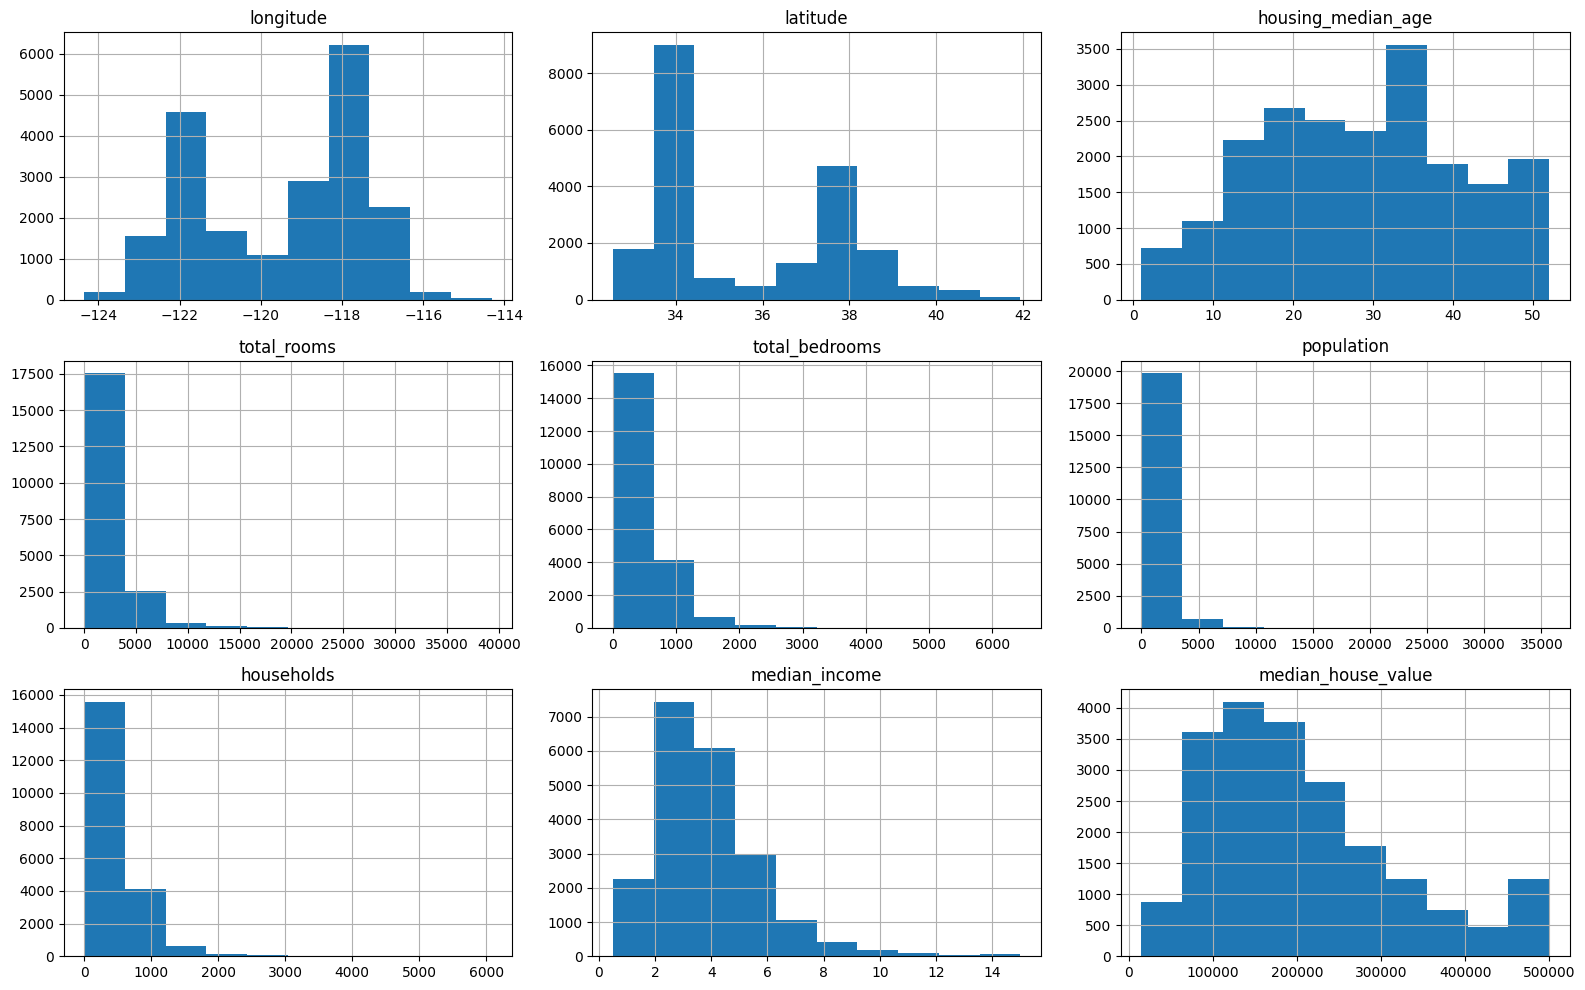

In [55]:
data.hist(figsize=(16,10))
plt.tight_layout()

In [56]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [57]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)

In [58]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


<Axes: xlabel='longitude', ylabel='latitude'>

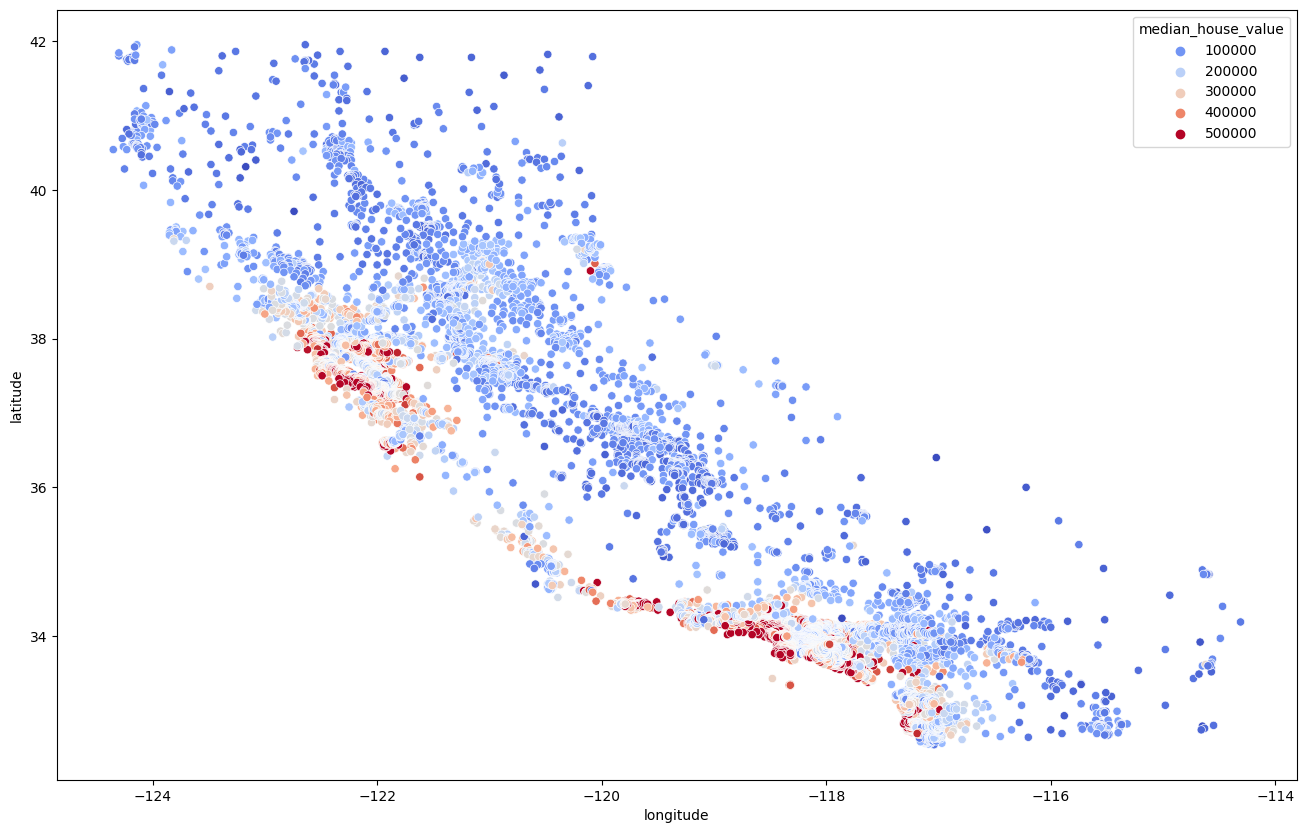

In [60]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = data,x = "longitude", y = "latitude", hue = "median_house_value",palette= "coolwarm")

### 3. Normalizing Data

In [61]:
data['total_rooms'] = np.log10(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log10(data['total_bedrooms'] + 1)
data['population'] = np.log10(data['population'] + 1)
data['households'] = np.log10(data['households'] + 1)

<Axes: >

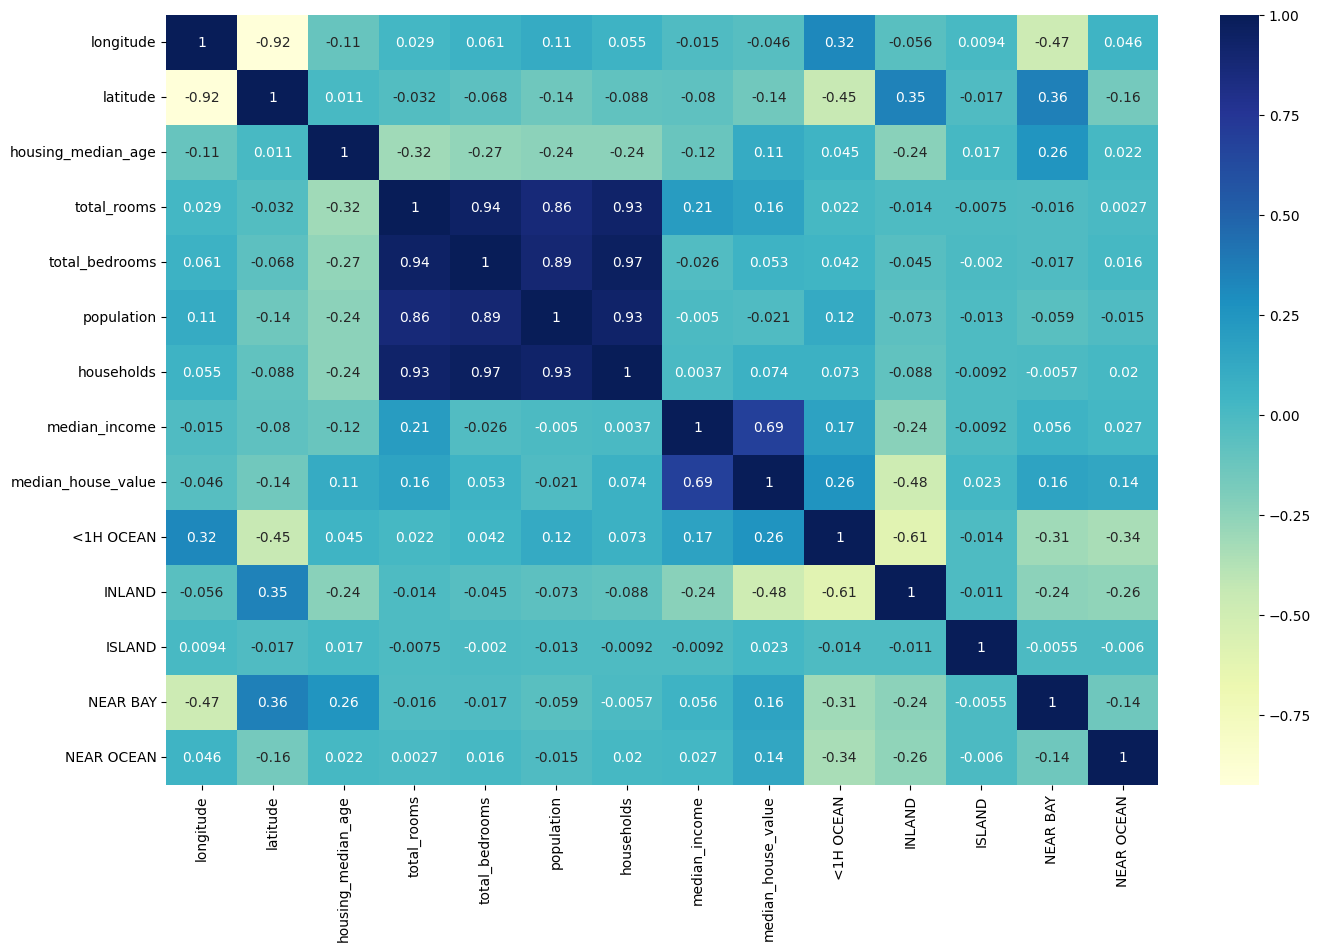

In [62]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot= True, cmap = "YlGnBu")

- how many room has bedrooms

In [64]:
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

<Axes: >

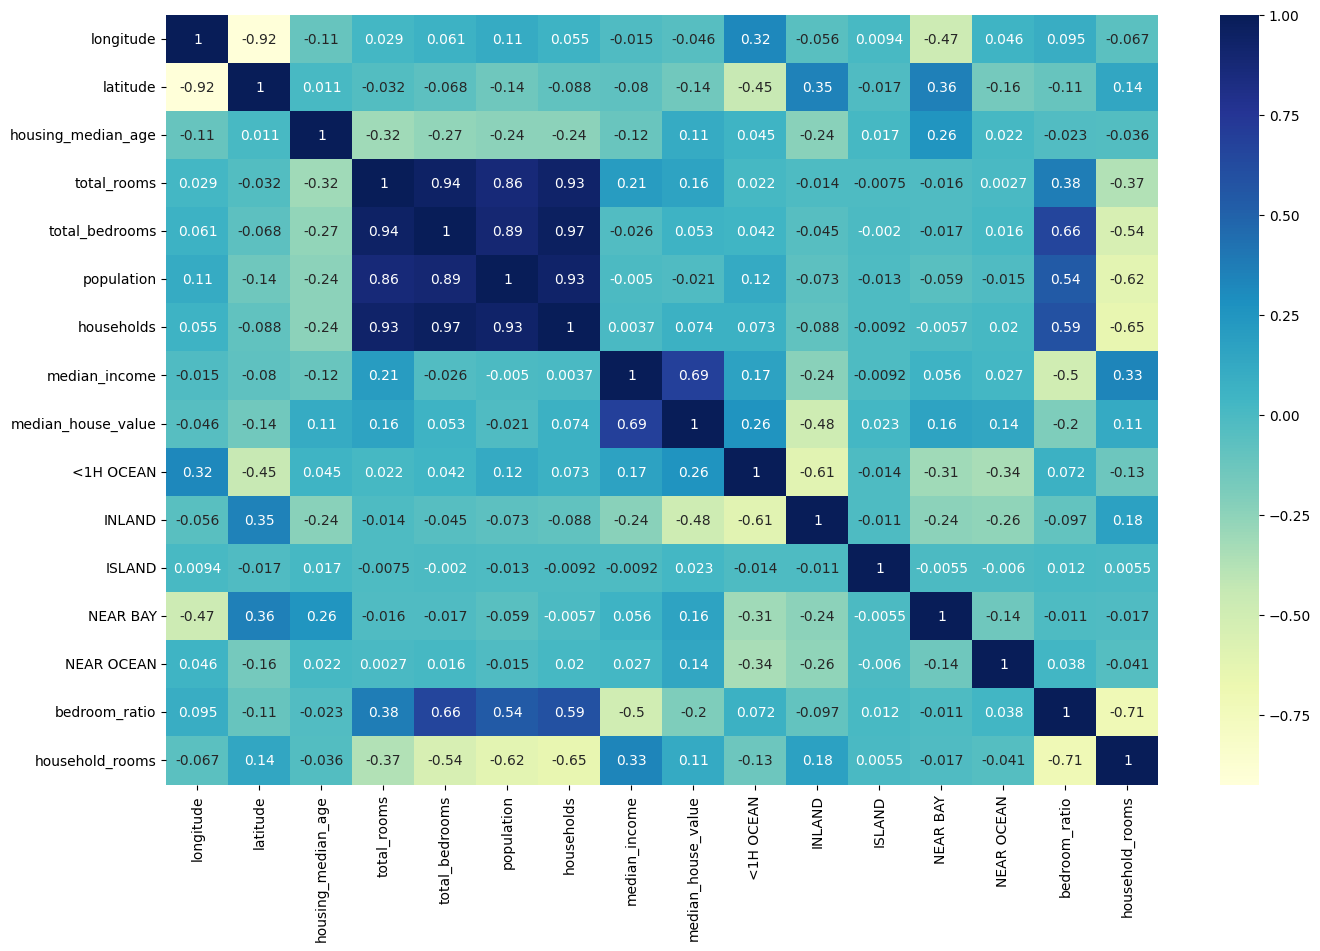

In [65]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot= True, cmap = "YlGnBu")

In [66]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis= 1)
y = data['median_house_value']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 15)
(4128, 15)
(16512,)
(4128,)


In [71]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [72]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8251,-118.18,33.78,26.0,3.483302,3.098298,3.682416,3.057666,1.7701,False,False,False,False,True,0.889471,1.139203
12941,-121.26,38.65,17.0,3.424228,2.625312,2.996512,2.585461,4.6484,False,True,False,False,False,0.766687,1.324417
11279,-117.96,33.80,35.0,3.174351,2.428135,2.909556,2.436163,5.2440,True,False,False,False,False,0.764923,1.303013
10142,-117.89,33.90,23.0,3.185825,2.356026,2.841359,2.363612,7.8980,True,False,False,False,False,0.739534,1.347863
9144,-117.79,34.45,18.0,3.475235,2.776701,3.132260,2.674861,3.2765,False,True,False,False,False,0.798997,1.299221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,-122.52,37.92,47.0,2.899821,2.214844,2.525045,2.181844,5.8509,False,False,False,True,False,0.763787,1.329069
12514,-121.45,38.56,51.0,3.097257,2.372912,2.656098,2.367356,2.6250,False,True,False,False,False,0.766133,1.308319
6275,-117.93,34.01,23.0,3.503655,2.922725,3.589279,2.924796,2.1863,True,False,False,False,False,0.834193,1.197914
10497,-117.67,33.51,17.0,3.324899,2.682145,3.277380,2.637490,4.0388,True,False,False,False,False,0.806685,1.260630


In [75]:
reg.score(X_test,y_test)

0.6665946760014029

In [76]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

In [77]:
forest.score(X_test,y_test)

0.8184892709823327